In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from nltk import word_tokenize
import re
import string
import nltk
nltk.download('punkt')


%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\margo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Import data

In [5]:
# import without new features
#df = pd.read_csv("../data/corpus_train.csv", sep="|")

# import with features
df = pd.read_csv("../data/corpus_train_complete.csv", index_col=0)

In [6]:
df.head()

,paragraph,author,len_paragraph,nb_tokens,nb_sentences,nb_tokens_per_sentences,nb_words,nb_unique_words,nb_punct,nb_punct_relative,paragraph_no_names
0,Beaucoup de gens ont envié la douce existence ...,Balzac,1027,192,5,37.400000,172,123,20,0.104167,Beaucoup de gens ont envié la douce existence ...
1,"Un mercredi, de grand matin, vers le milieu du...",Balzac,425,85,2,41.500000,73,63,12,0.141176,"Un mercredi, de grand matin, vers le milieu du..."
2,"--Ah! c'est toi, Suzanne? dit le chevalier de ...",Balzac,211,41,4,9.250000,35,33,6,0.146341,"--Ah! c'est toi, ? dit le sans discontinuer s..."
3,"Cette charmante Suzanne, dont la comique avent...",Balzac,5557,1015,33,29.757576,887,439,128,0.126108,"Cette charmante , dont la comique aventure dev..."
4,"Suzanne, une de ses favorites, spirituelle, am...",Balzac,563,107,2,52.500000,91,77,16,0.149533,"Suzanne, une de ses favorites, spirituelle, am..."


In [4]:
df.shape

(47202, 2)

### Distribution of the authors in the database

<BarContainer object of 10 artists>

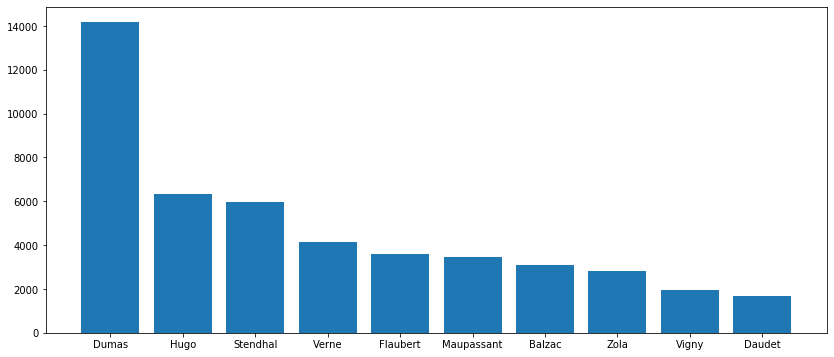

In [7]:
count = Counter(df['author']).most_common()

x = [t[0] for t in count]
y = [t[1] for t in count]

plt.figure(figsize=(14, 6))
plt.bar(x=x, height=y)

### Length of paragraphs

Statistics on the length of paragraphs

In [6]:
df['paragraph'].apply(len).describe()

count    47202.000000
mean       366.902737
std        469.902017
min        101.000000
25%        151.000000
50%        232.000000
75%        408.000000
max      16283.000000
Name: paragraph, dtype: float64

### New features
- length of paragraph
- number of tokens
- number of sentences
- average number of tokens per sentence
- number of words
- number of different words
- number of punctuation tokens
- relative number of punctuation tokens among all tokens

In [7]:
punc = string.punctuation

def get_features_par(paragraph):
    tokens = word_tokenize(paragraph)
    sentences = re.split('[.?!]', paragraph)
    sentences = [s for s in sentences if s]
    sentences = [s.strip() for s in sentences]
    sentences_tokens = [word_tokenize(x) for x in sentences]
    words = [x for x in tokens if x not in list(punc)]
    words = [x.lower() for x in words]
    
    len_paragraph = len(paragraph)
    nb_tokens = len(tokens)
    nb_sentences = len(sentences)
    nb_words = len(words)
    nb_punct = sum([tokens.count(i) for i in punc])
    nb_punct_relative = nb_punct/nb_tokens
    nb_unique_words = len(set(words))
    nb_tokens_per_sentences = np.mean([len(x) for x in sentences_tokens])
    
    list_features = [len_paragraph, nb_tokens, nb_sentences, nb_tokens_per_sentences, nb_words, nb_unique_words,
                     nb_punct, nb_punct_relative]                    
    
    return list_features

In [8]:
def get_features_corpus(corpus):
    dict_features = {}
    
    len_paragraph = []
    nb_tokens = []
    nb_sentences = []
    nb_tokens_per_sentences = [] 
    nb_words = []
    nb_unique_words = [] 
    nb_punct = []
    nb_punct_relative = []
        
    for par in corpus:
        features = get_features_par(par)
        len_paragraph.append(features[0])
        nb_tokens.append(features[1])
        nb_sentences.append(features[2])
        nb_tokens_per_sentences.append(features[3])
        nb_words.append(features[4])
        nb_unique_words.append(features[5])
        nb_punct.append(features[6])
        nb_punct_relative.append(features[7])
        
    dict_features['len_paragraph'] = len_paragraph
    dict_features['nb_tokens'] = nb_tokens
    dict_features['nb_sentences'] = nb_sentences
    dict_features['nb_tokens_per_sentences'] = nb_tokens_per_sentences
    dict_features['nb_words'] = nb_words
    dict_features['nb_unique_words'] = nb_unique_words
    dict_features['nb_punct'] = nb_punct
    dict_features['nb_punct_relative'] = nb_punct_relative
    
    return dict_features

In [9]:
new_features = get_features_corpus(df['paragraph'])

In [10]:
df_features = pd.DataFrame.from_dict(new_features)

In [11]:
df = pd.DataFrame.join(df, df_features)

In [14]:
df.shape

(47202, 10)

In [12]:
df.head()

,paragraph,author,len_paragraph,nb_tokens,nb_sentences,nb_tokens_per_sentences,nb_words,nb_unique_words,nb_punct,nb_punct_relative
0,Beaucoup de gens ont envié la douce existence ...,Balzac,1027,192,5,37.400000,172,123,20,0.104167
1,"Un mercredi, de grand matin, vers le milieu du...",Balzac,425,85,2,41.500000,73,63,12,0.141176
2,"--Ah! c'est toi, Suzanne? dit le chevalier de ...",Balzac,211,41,4,9.250000,35,33,6,0.146341
3,"Cette charmante Suzanne, dont la comique avent...",Balzac,5557,1015,33,29.757576,887,439,128,0.126108
4,"Suzanne, une de ses favorites, spirituelle, am...",Balzac,563,107,2,52.500000,91,77,16,0.149533


In [15]:
df.groupby(['author']).mean()

,len_paragraph,nb_tokens,nb_sentences,nb_tokens_per_sentences,nb_words,nb_unique_words,nb_punct,nb_punct_relative
author,,,,,,,,
Balzac,741.020786,143.012666,6.155895,22.450485,124.834037,81.368301,18.178629,0.136067
Daudet,401.366647,82.690716,4.943229,18.964801,71.131875,55.148433,11.558841,0.141084
Dumas,249.582628,50.105490,2.174217,26.594832,43.255504,35.705334,6.849986,0.139787
Flaubert,369.463817,72.430008,3.575300,22.256513,61.470243,49.194747,10.959765,0.154951
Hugo,431.218084,84.964336,4.644469,21.879684,73.039293,53.214613,11.925043,0.137919
Maupassant,251.812698,50.152830,2.628555,23.090483,43.019247,35.969836,7.133582,0.142980
Stendhal,383.397246,79.320013,3.463734,24.395744,70.238583,52.584956,9.081430,0.119802
Verne,324.054541,61.289044,3.062230,21.767564,52.692215,43.596828,8.596828,0.143414
Vigny,395.464781,78.482776,3.097686,28.775896,68.212339,52.040103,10.270437,0.139331


### Name entities recognition

In [11]:
import spacy
import fr_core_news_md

In [12]:
nlp = fr_core_news_md.load()

In [42]:
doc = nlp("Margot habite à Paris, capitale de la France, où il pleut tout le temps")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    
    
doc = nlp("Victor Hugo et Honoré de Balzac sont des grands écrivains du 19ème siècle")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Margot 0 6 PER
Paris 16 21 LOC
Victor Hugo 0 11 PER
Honoré de Balzac 15 31 PER


#### Test on a paragraph with multiples named entities.

In [62]:
par = df['paragraph'][3]

In [63]:
doc = nlp(par)

names = []
for ent in doc.ents:
    names.append(ent)
print(names)

[Suzanne, madame Lardot, Receveur-Général, Valois, madame Lardot, madame Lardot, Grévin, amiral Simeuse, Indes, madame Lardot, Valois, Valois, chevalier de Valois, Longchamps, Chevalerie-Errante, Alençon, Duthé, comte d'Artois, chevalier de Valois, chevalier de Valois, Alençon, Sartines]


In [64]:
names = set([str(x) for x in names])

In [65]:
names

{'Alençon',
 'Chevalerie-Errante',
 'Duthé',
 'Grévin',
 'Indes',
 'Longchamps',
 'Receveur-Général',
 'Sartines',
 'Suzanne',
 'Valois',
 'amiral Simeuse',
 'chevalier de Valois',
 "comte d'Artois",
 'madame Lardot'}

In [68]:
for name in names:
    par = par.replace(name, '')

In [69]:
par

"Cette charmante , dont la comique aventure devait exercer une si grande influence sur la destinée des principaux personnages de cette histoire, était une ouvrière de . Un mot sur la topographie de la maison. Les ateliers occupaient tout le rez-de-chaussée. La petite cour servait à étendre sur des cordes en crin les mouchoirs brodés, les collerettes, les canezous, les manchettes, les chemises à jabot, les cravates, les dentelles, les robes brodées, tout le linge fin des meilleures maisons de la ville. Le chevalier prétendait savoir, par le nombre de canezous de la femme du , le menu de ses intrigues; car il se trouvait des chemises à jabot et des cravates en corrélation avec les canezous et les collerettes. Quoique pouvant tout deviner par cette espèce de tenue en partie double des rendez-vous de la ville, le chevalier ne commit jamais une indiscrétion, il ne dit jamais une épigramme susceptible de lui faire fermer une maison (et il avait de l'esprit!) Aussi prendrez-vous monsieur de  

#### Fonction that remove the named entities from a paragraph.

In [44]:
def remove_named_entities(paragraph):
    nlp = fr_core_news_md.load()
    doc = nlp(paragraph)
    
    names = []
    for ent in doc.ents:
        # list of all the named entities recognized in the paragraph
        names.append(ent)
    # keep unique elements and convert to string    
    names = set([str(x) for x in names])
    
    # remove named entities from the paragraph
    paragraph_no_names = paragraph
    for name in names:
        paragraph_no_names = paragraph_no_names.replace(name, '')
        
    return paragraph_no_names

In [71]:
remove_named_entities(par)

"Cette charmante , dont la comique aventure devait exercer une si grande influence sur la destinée des principaux personnages de cette histoire, était une ouvrière de . Un mot sur la topographie de la maison. Les ateliers occupaient tout le rez-de-chaussée. La petite cour servait à étendre sur des cordes en crin les mouchoirs brodés, les collerettes, les canezous, les manchettes, les chemises à jabot, les cravates, les dentelles, les robes brodées, tout le linge fin des meilleures maisons de la ville. Le chevalier prétendait savoir, par le nombre de canezous de la femme du , le menu de ses intrigues; car il se trouvait des chemises à jabot et des cravates en corrélation avec les canezous et les collerettes. Quoique pouvant tout deviner par cette espèce de tenue en partie double des rendez-vous de la ville, le chevalier ne commit jamais une indiscrétion, il ne dit jamais une épigramme susceptible de lui faire fermer une maison (et il avait de l'esprit!) Aussi prendrez-vous monsieur de  

#### Create new column with tha paragraphs without the named entities.

In [76]:
paragraph_no_names = []
for i, par in enumerate(df['paragraph']):
    par_no_names = remove_named_entities(par)
    paragraph_no_names.append(par_no_names)
    if i%1000 == 0:
        print(i)

df['paragraph_no_names'] = paragraph_no_names

#### Export new train file with all the features

In [82]:
# save complete dataframe to csv
df.to_csv('../data/corpus_train_complete.csv')

#### Check problems with NER

In [40]:
# voir pb pour ligne 4 "Suzanne" encore present apres NER?
print(df['paragraph'][4])
remove_named_entities(df['paragraph'][4])

Suzanne, une de ses favorites, spirituelle, ambitieuse, avait en elle l'étoffe d'une Sophie Arnould, elle était d'ailleurs belle comme la plus belle courtisane que jamais Titien ait conviée à poser sur un velours noir pour aider son pinceau à faire une Vénus; mais sa figure, quoique fine dans le tour des yeux et du front, péchait en bas par des contours communs. C'était la beauté normande, fraîche, éclatante, rebondie, la chair de Rubens qu'il faudrait marier avec les muscles de l'Hercule-Farnèse, et non la Vénus de Médicis, cette gracieuse femme d'Apollon.


"Suzanne, une de ses favorites, spirituelle, ambitieuse, avait en elle l'étoffe d'une , elle était d'ailleurs belle comme la plus belle courtisane que jamais  ait conviée à poser sur un velours noir pour aider son pinceau à faire une ; mais sa figure, quoique fine dans le tour des yeux et du front, péchait en bas par des contours communs. C'était la beauté normande, fraîche, éclatante, rebondie, la chair de  qu'il faudrait marier avec les muscles de l'-, et non la  de , cette gracieuse femme d'."

In [29]:
print(df['paragraph'][30])
remove_named_entities(df['paragraph'][30])

--Suzanne, que diable veux-tu que je fasse? il est si extraordinaire.... Moi qui croyais... Le fait est que... mais non, non, cela ne se peut pas...


'--Suzanne, que diable veux-tu que je fasse? il est si extraordinaire.... Moi qui croyais... Le fait est que... mais non, non, cela ne se peut pas...'

In [42]:
doc = nlp(df['paragraph'][4])

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Sophie Arnould 85 99 PER
Titien 171 177 PER
Vénus 253 258 LOC
Rubens 435 441 PER
Hercule 486 493 LOC
Farnèse 494 501 PER
Vénus 513 518 LOC
Médicis 522 529 PER
Apollon 555 562 PER


In [43]:
doc = nlp(df['paragraph'][30])

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)